**Import main libs**

---


In [ ]:
# (Pandas - Matplotlib - ScikitLearn)
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

**Load Data & View it**

---



In [ ]:
# Read Data
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
# Show first 5 rows
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**MetaData**

---



In [ ]:
# No nulls & No Data conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Stats Info
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


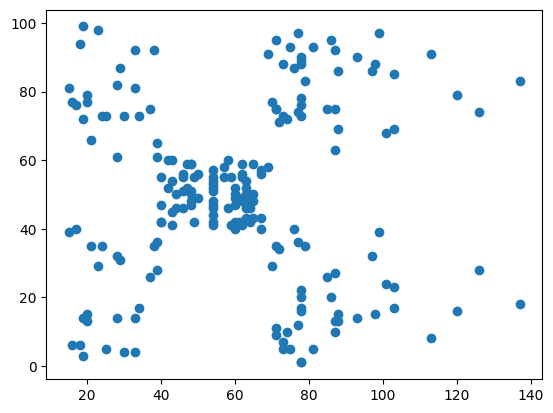

In [ ]:
# Show Data
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

**PreProcessing**

---



In [ ]:
# Select features
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Scalling Data to avoid one feature dominating
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Clustring**

---



In [ ]:
# Elbow method
from sklearn.cluster import KMeans

inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

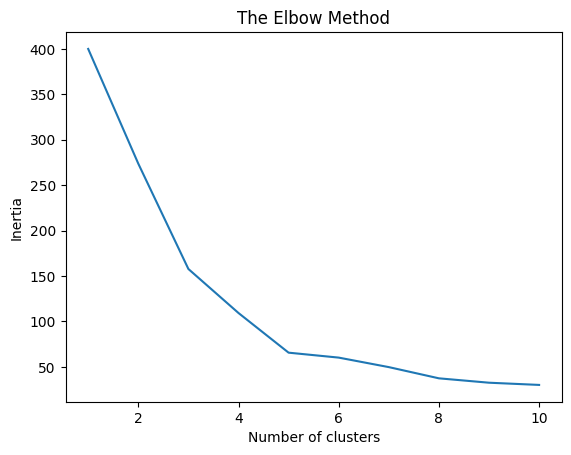

In [ ]:
# How Determine Best K ?
plt.plot(range(1,11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Best K = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [ ]:
# Add Column for classification
data['Cluster'] = y_kmeans

**Result**

---



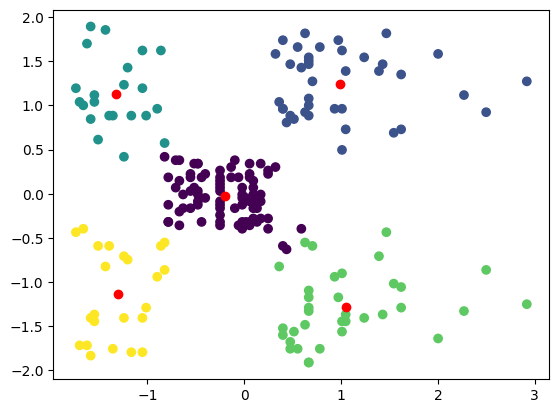

In [ ]:
# Now ?
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

**Analyze Result**

---



In [ ]:
# mean for all clusters ?
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
